# PTID-CDS-JUN22-1329

# PRCP-1016-Heart Disease Prediction

## Problem:
          World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases.Half   the deaths in the United States and other developed countries are due to cardio vascular diseases.The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the    complications.This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the   overall risk using logistic regression.

## Solution:
    The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

I have implemented Model to predict Coronary Heart Disease.



## Libraries Used:
1. Pandas (for data manipulation)
2. Matplotlib (for data visualization)
3. Seaborn (for data visualization)
4. Scikit-Learn (for data modeling)

## Contents
1. Importing the required libraries.
2. Importing and Reading the dataset.
3. Exploratory Data Analysis (EDA)
4. Data-Preprocessing
5. Data Visualization
    * Correlation Matrix
    * Pairplot
    * Countplots  
6. Data Modeling
   * Separating the data into features and target variable.
   * Splitting the data into training and test sets.
   * Modeling/ Training the data
   * Predicting the data
   * Calculating the prediction scores
   * Getting the model's accuracy
      - Classification Report
      - Confusion Matrix
      - Plotting the confusion matrix
      - ROC curve

### Importing Libraries:

In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score , classification_report,precision_score,f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset:

In [84]:
data1=pd.read_csv('values.csv')
data1

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [85]:
data2=pd.read_csv("labels.csv")
data2

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


### Merging Labels & Values Dataset:

In [86]:
data = pd.merge(data2,data1,on = 'patient_id')
data

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


### Basic Checks:

In [87]:
data.head()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [88]:
data.tail()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,0,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   heart_disease_present                 180 non-null    int64  
 2   slope_of_peak_exercise_st_segment     180 non-null    int64  
 3   thal                                  180 non-null    object 
 4   resting_blood_pressure                180 non-null    int64  
 5   chest_pain_type                       180 non-null    int64  
 6   num_major_vessels                     180 non-null    int64  
 7   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 8   resting_ekg_results                   180 non-null    int64  
 9   serum_cholesterol_mg_per_dl           180 non-null    int64  
 10  oldpeak_eq_st_depression              180 non-null    float64
 11  sex                

In [90]:
data.shape

(180, 15)

In [91]:
data.describe()

,heart_disease_present,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.444444,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.498290,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,0.000000,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,0.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,0.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,1.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,1.000000,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [92]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
heart_disease_present,180.0,0.444444,0.498290,0.0,0.00,0.0,1.00,1.0
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0


In [93]:
data.describe(include=['O'])

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


## Exploratory Data Analysis (EDA)

### Univariate Analysis

                                             |                                             | [  0%]   00:00 ->…


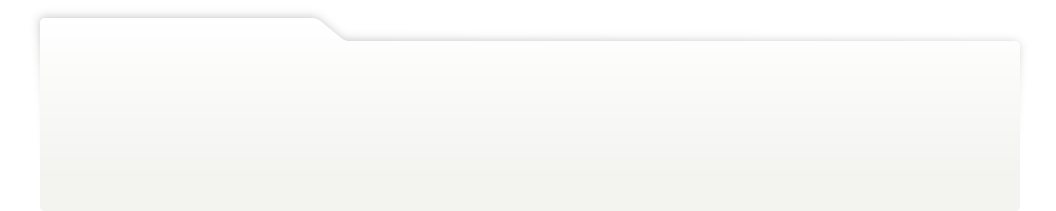
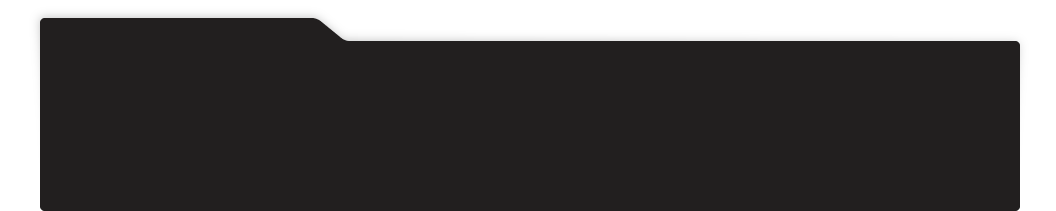
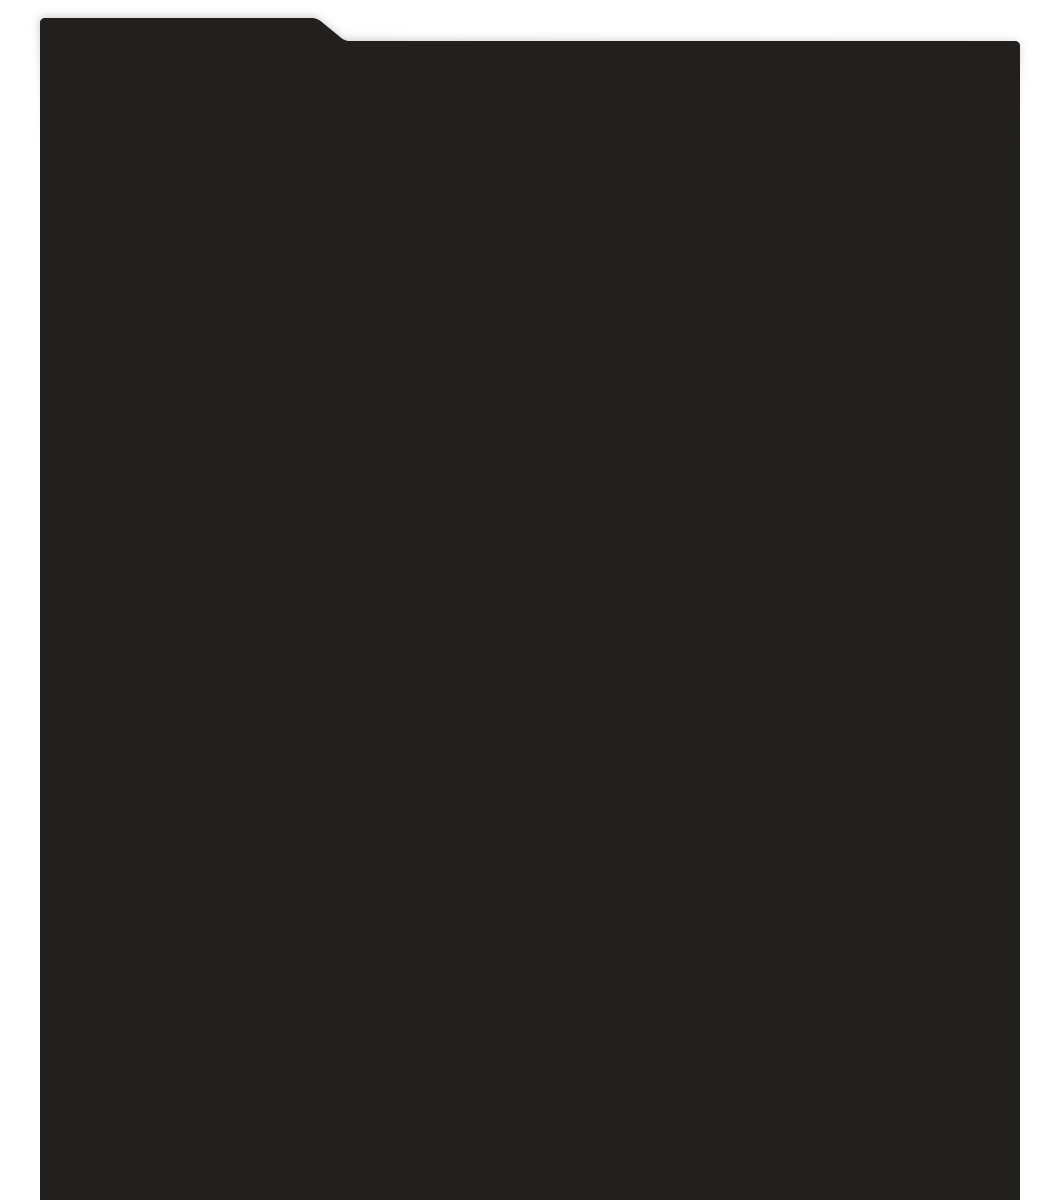
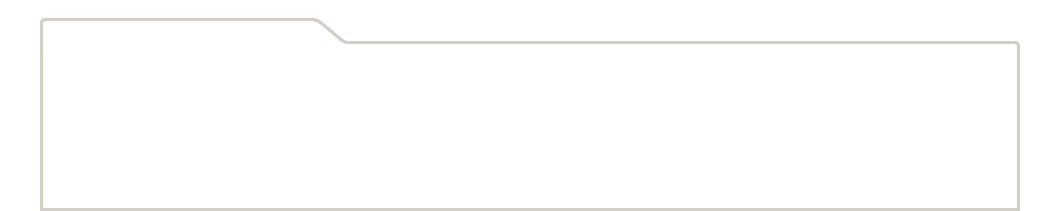
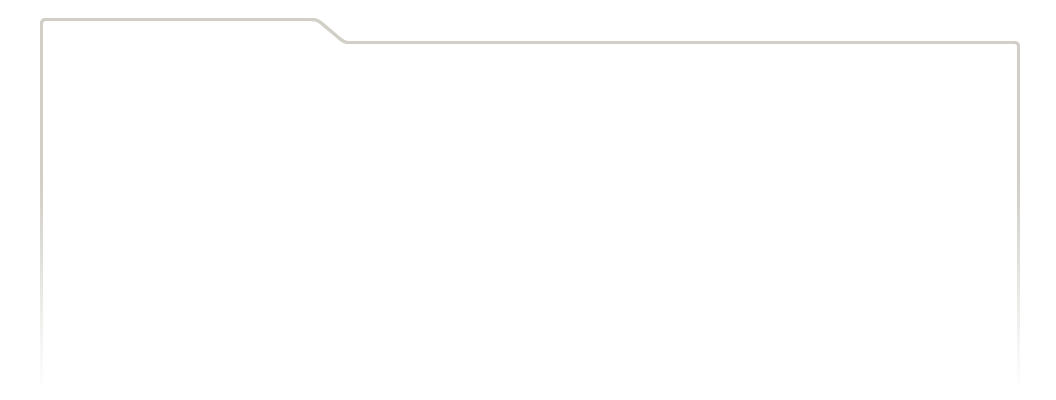
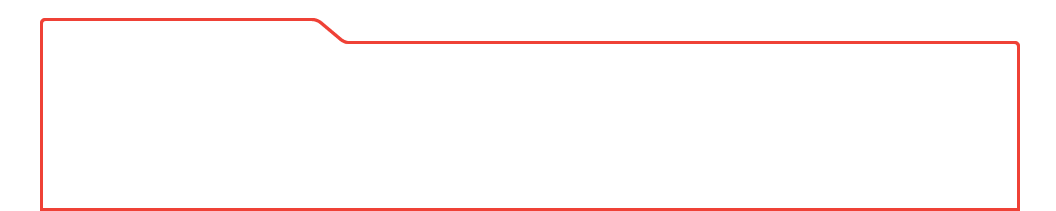
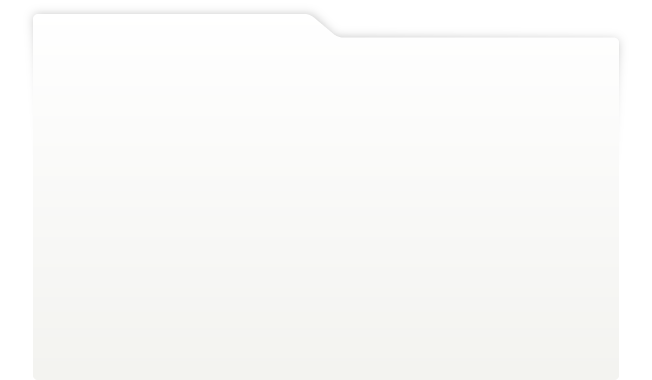
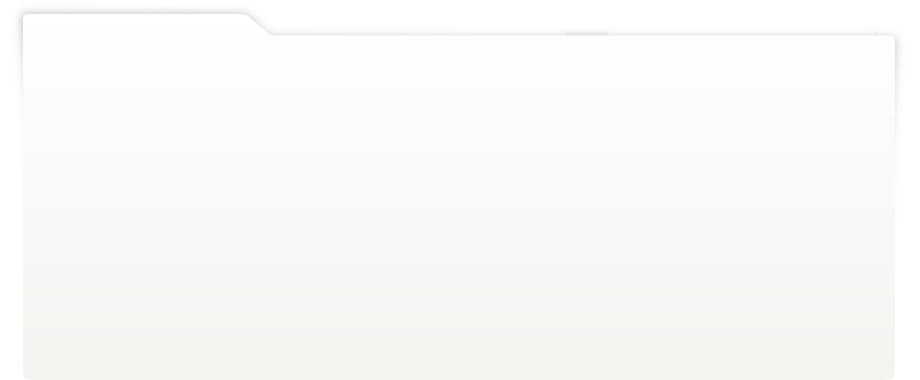
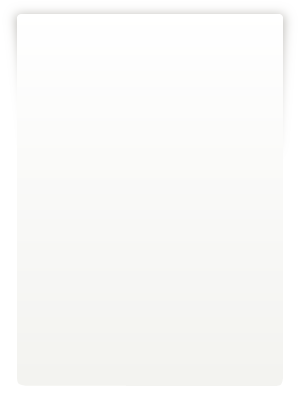
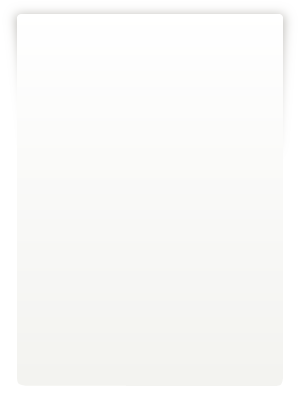
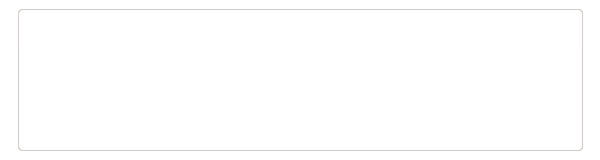
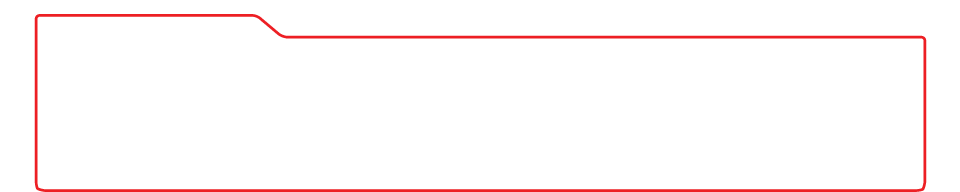
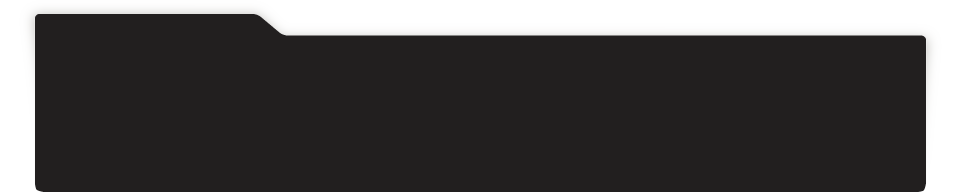
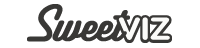
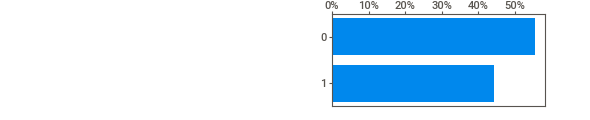
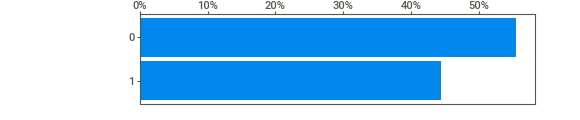
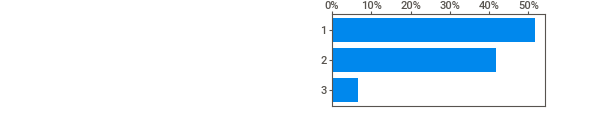
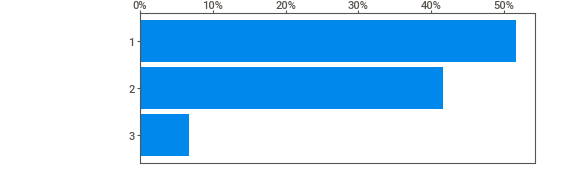
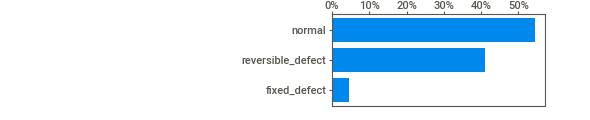
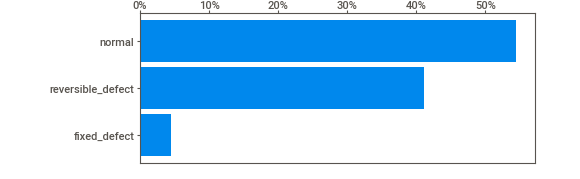
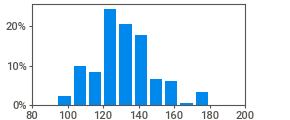
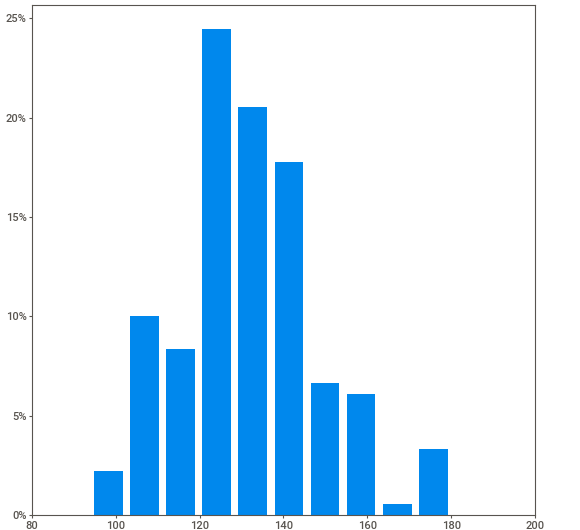
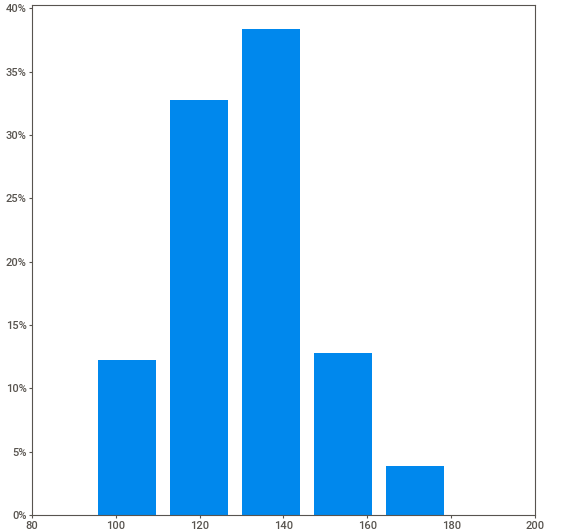
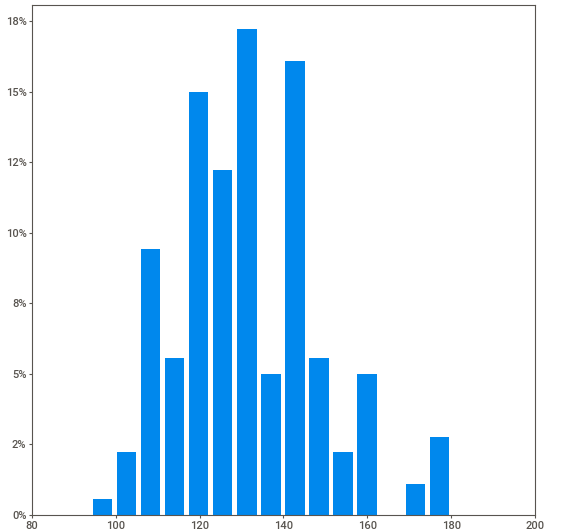
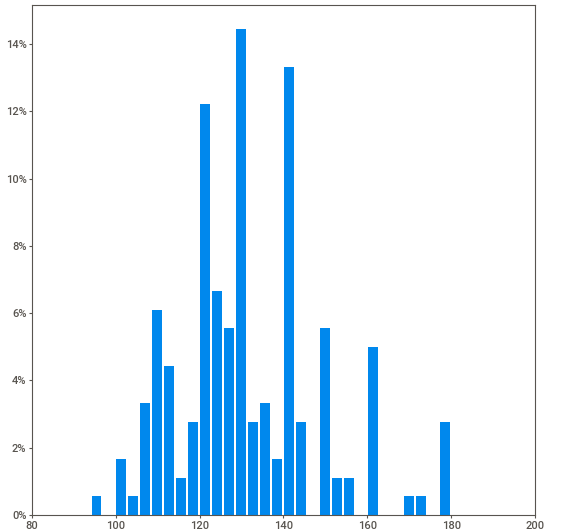
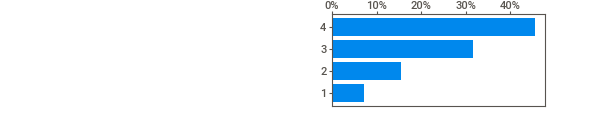
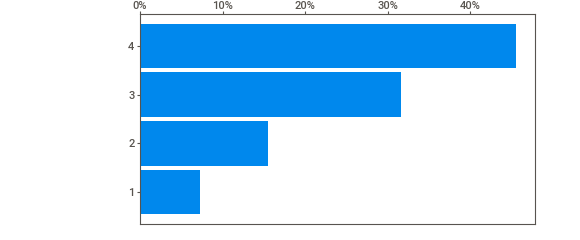
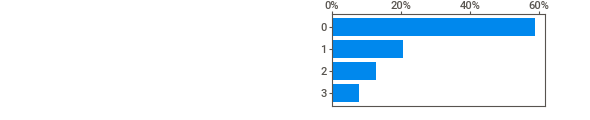
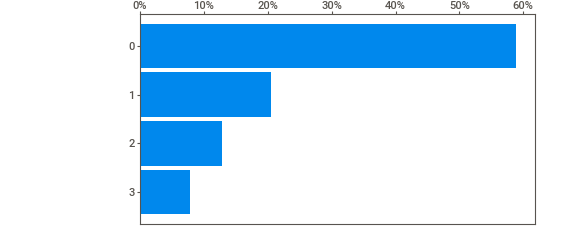
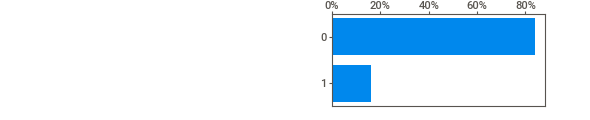
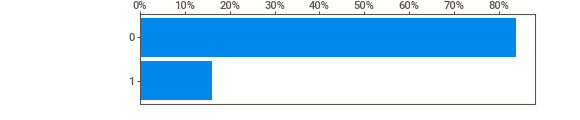
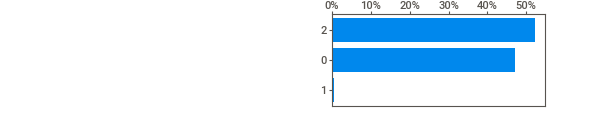
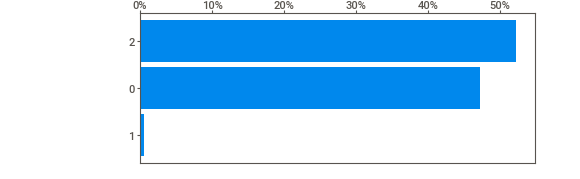
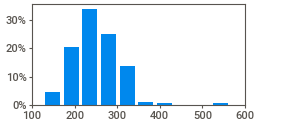
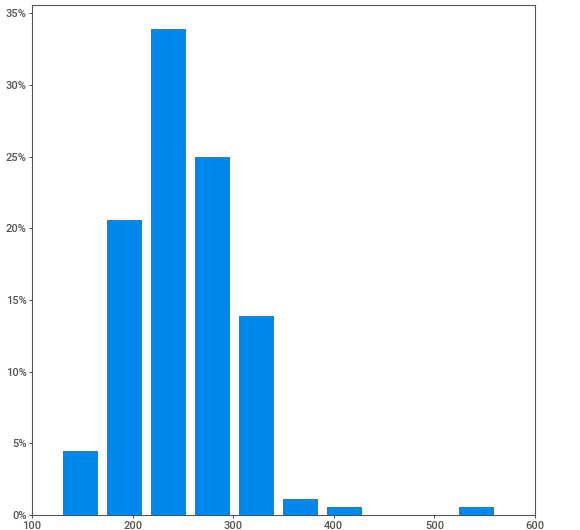
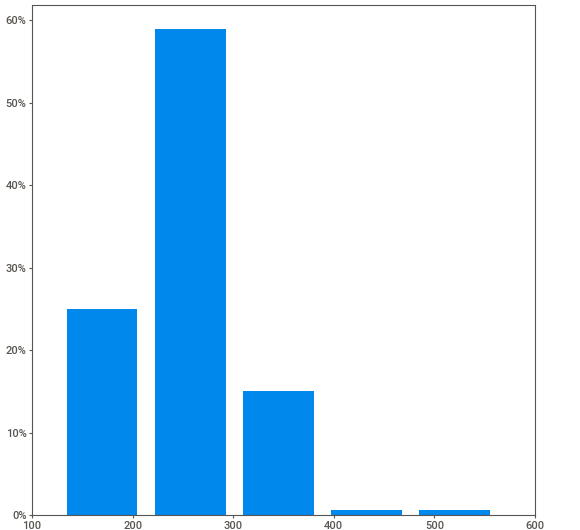
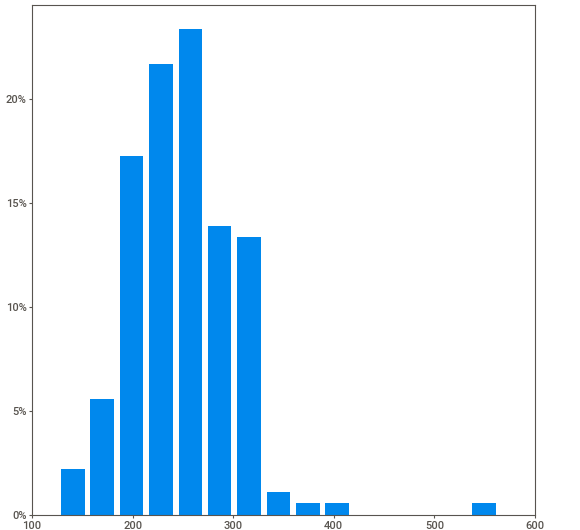
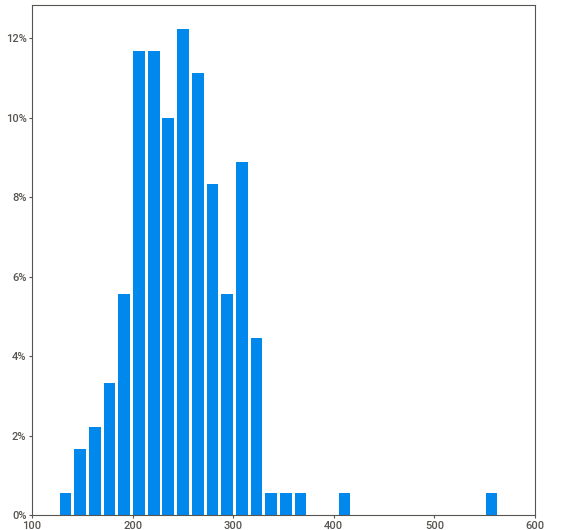
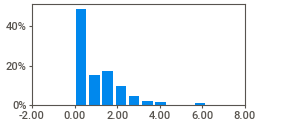
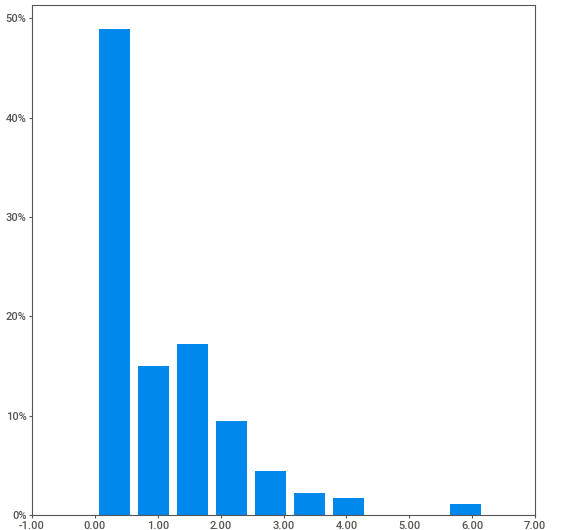
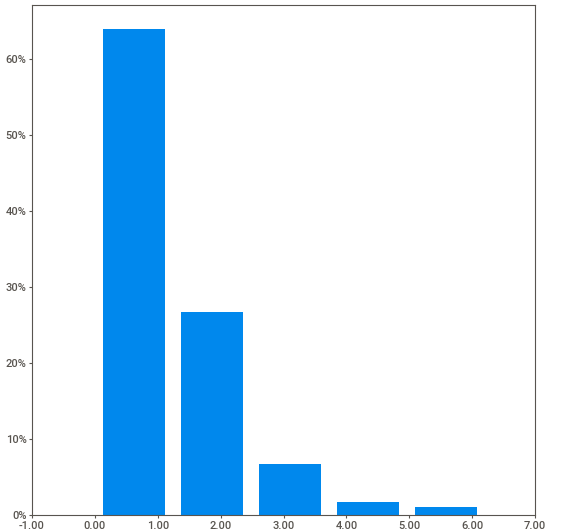
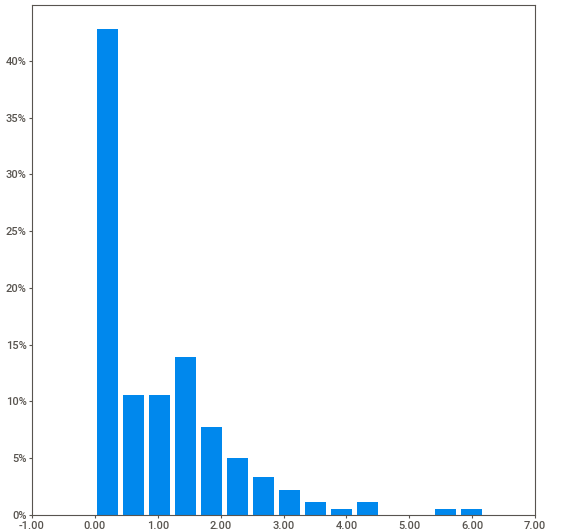
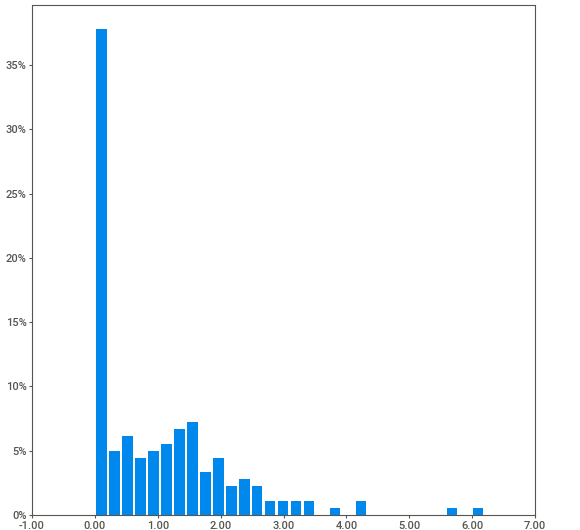
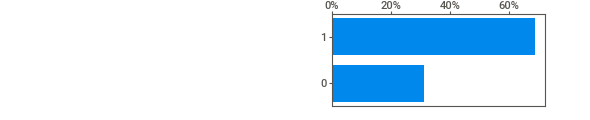
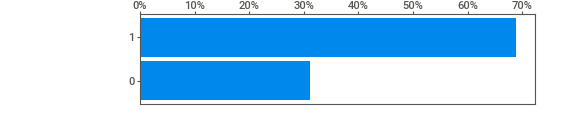
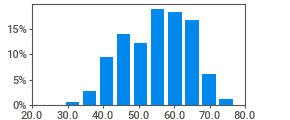
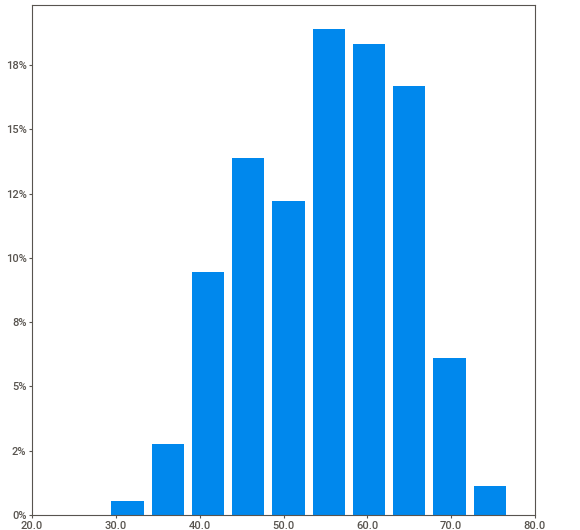
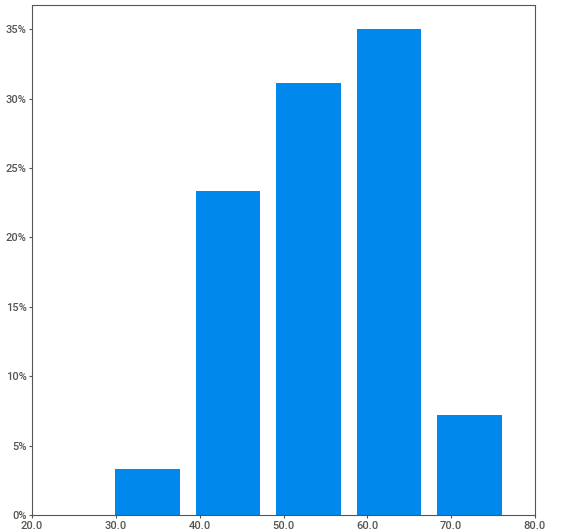
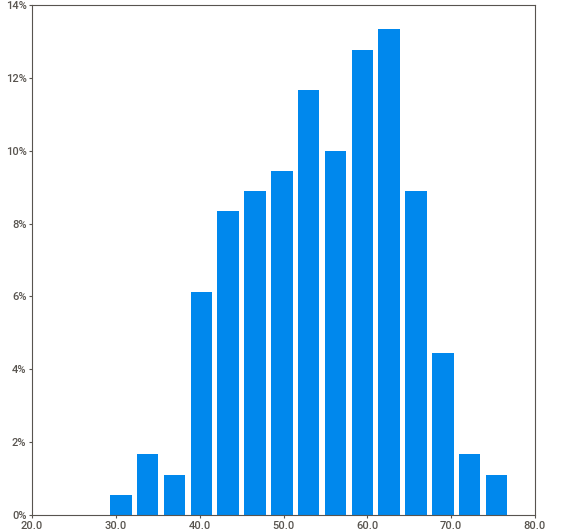
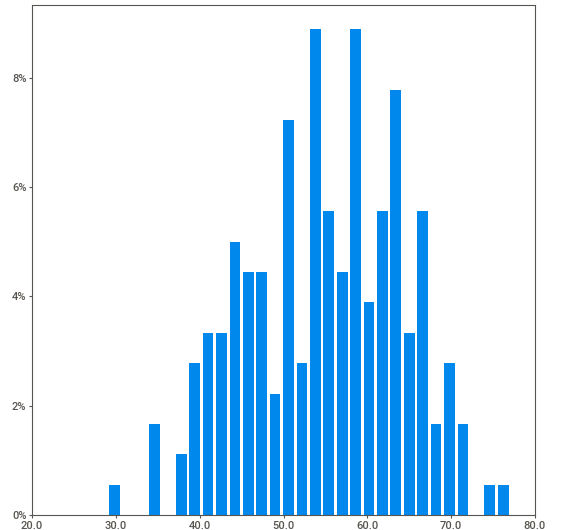
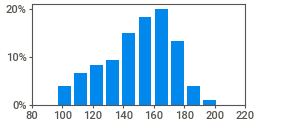
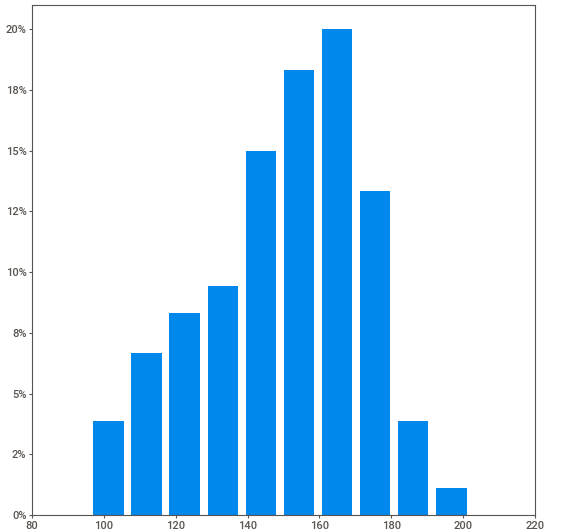
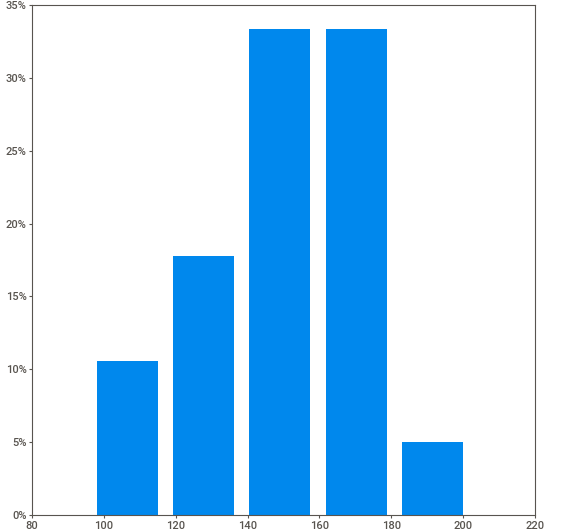
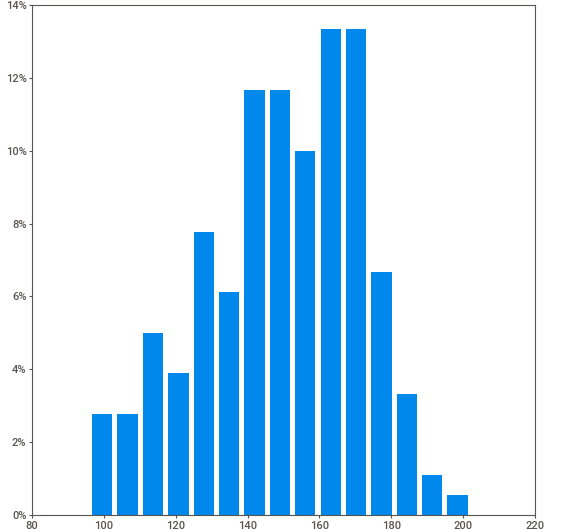
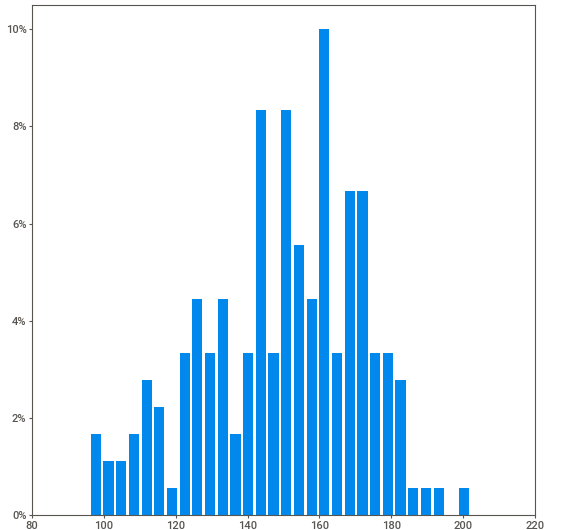
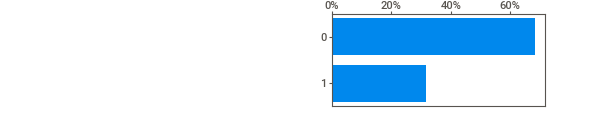
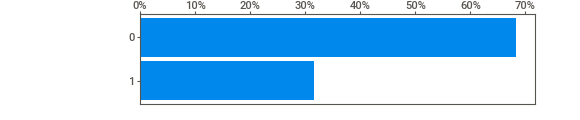
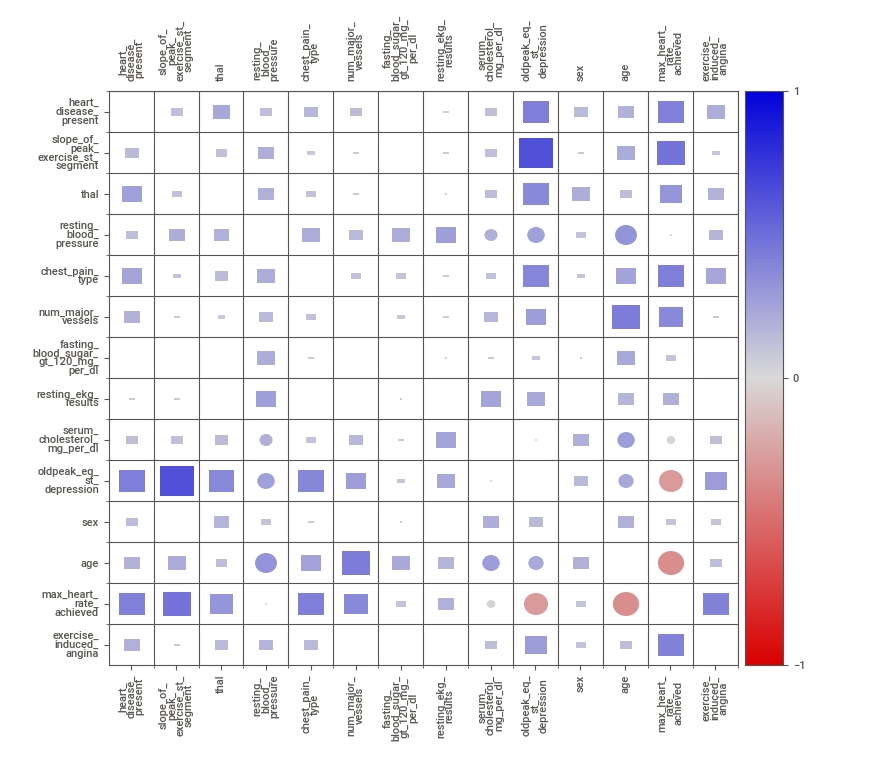
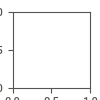

In [94]:
import sweetviz as sv #  library for univariant analysis
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_notebook() # Default arguments will generate to "SWEETVIZ_REPORT.html"
import warnings
warnings.filterwarnings("ignore")

In [95]:
#insights:More than 50% data has normal thal.More than 40% data has chest pain value 4.more than 60% has  zero excercise 
# induce angina.Only around 1% data has resting ekg 1.more than 60% data belongs to males.more than 45% data is of age group 
# 55 to 65.Positive skewness and kurtosis in serum cholesterol

### Bivariate Analysis

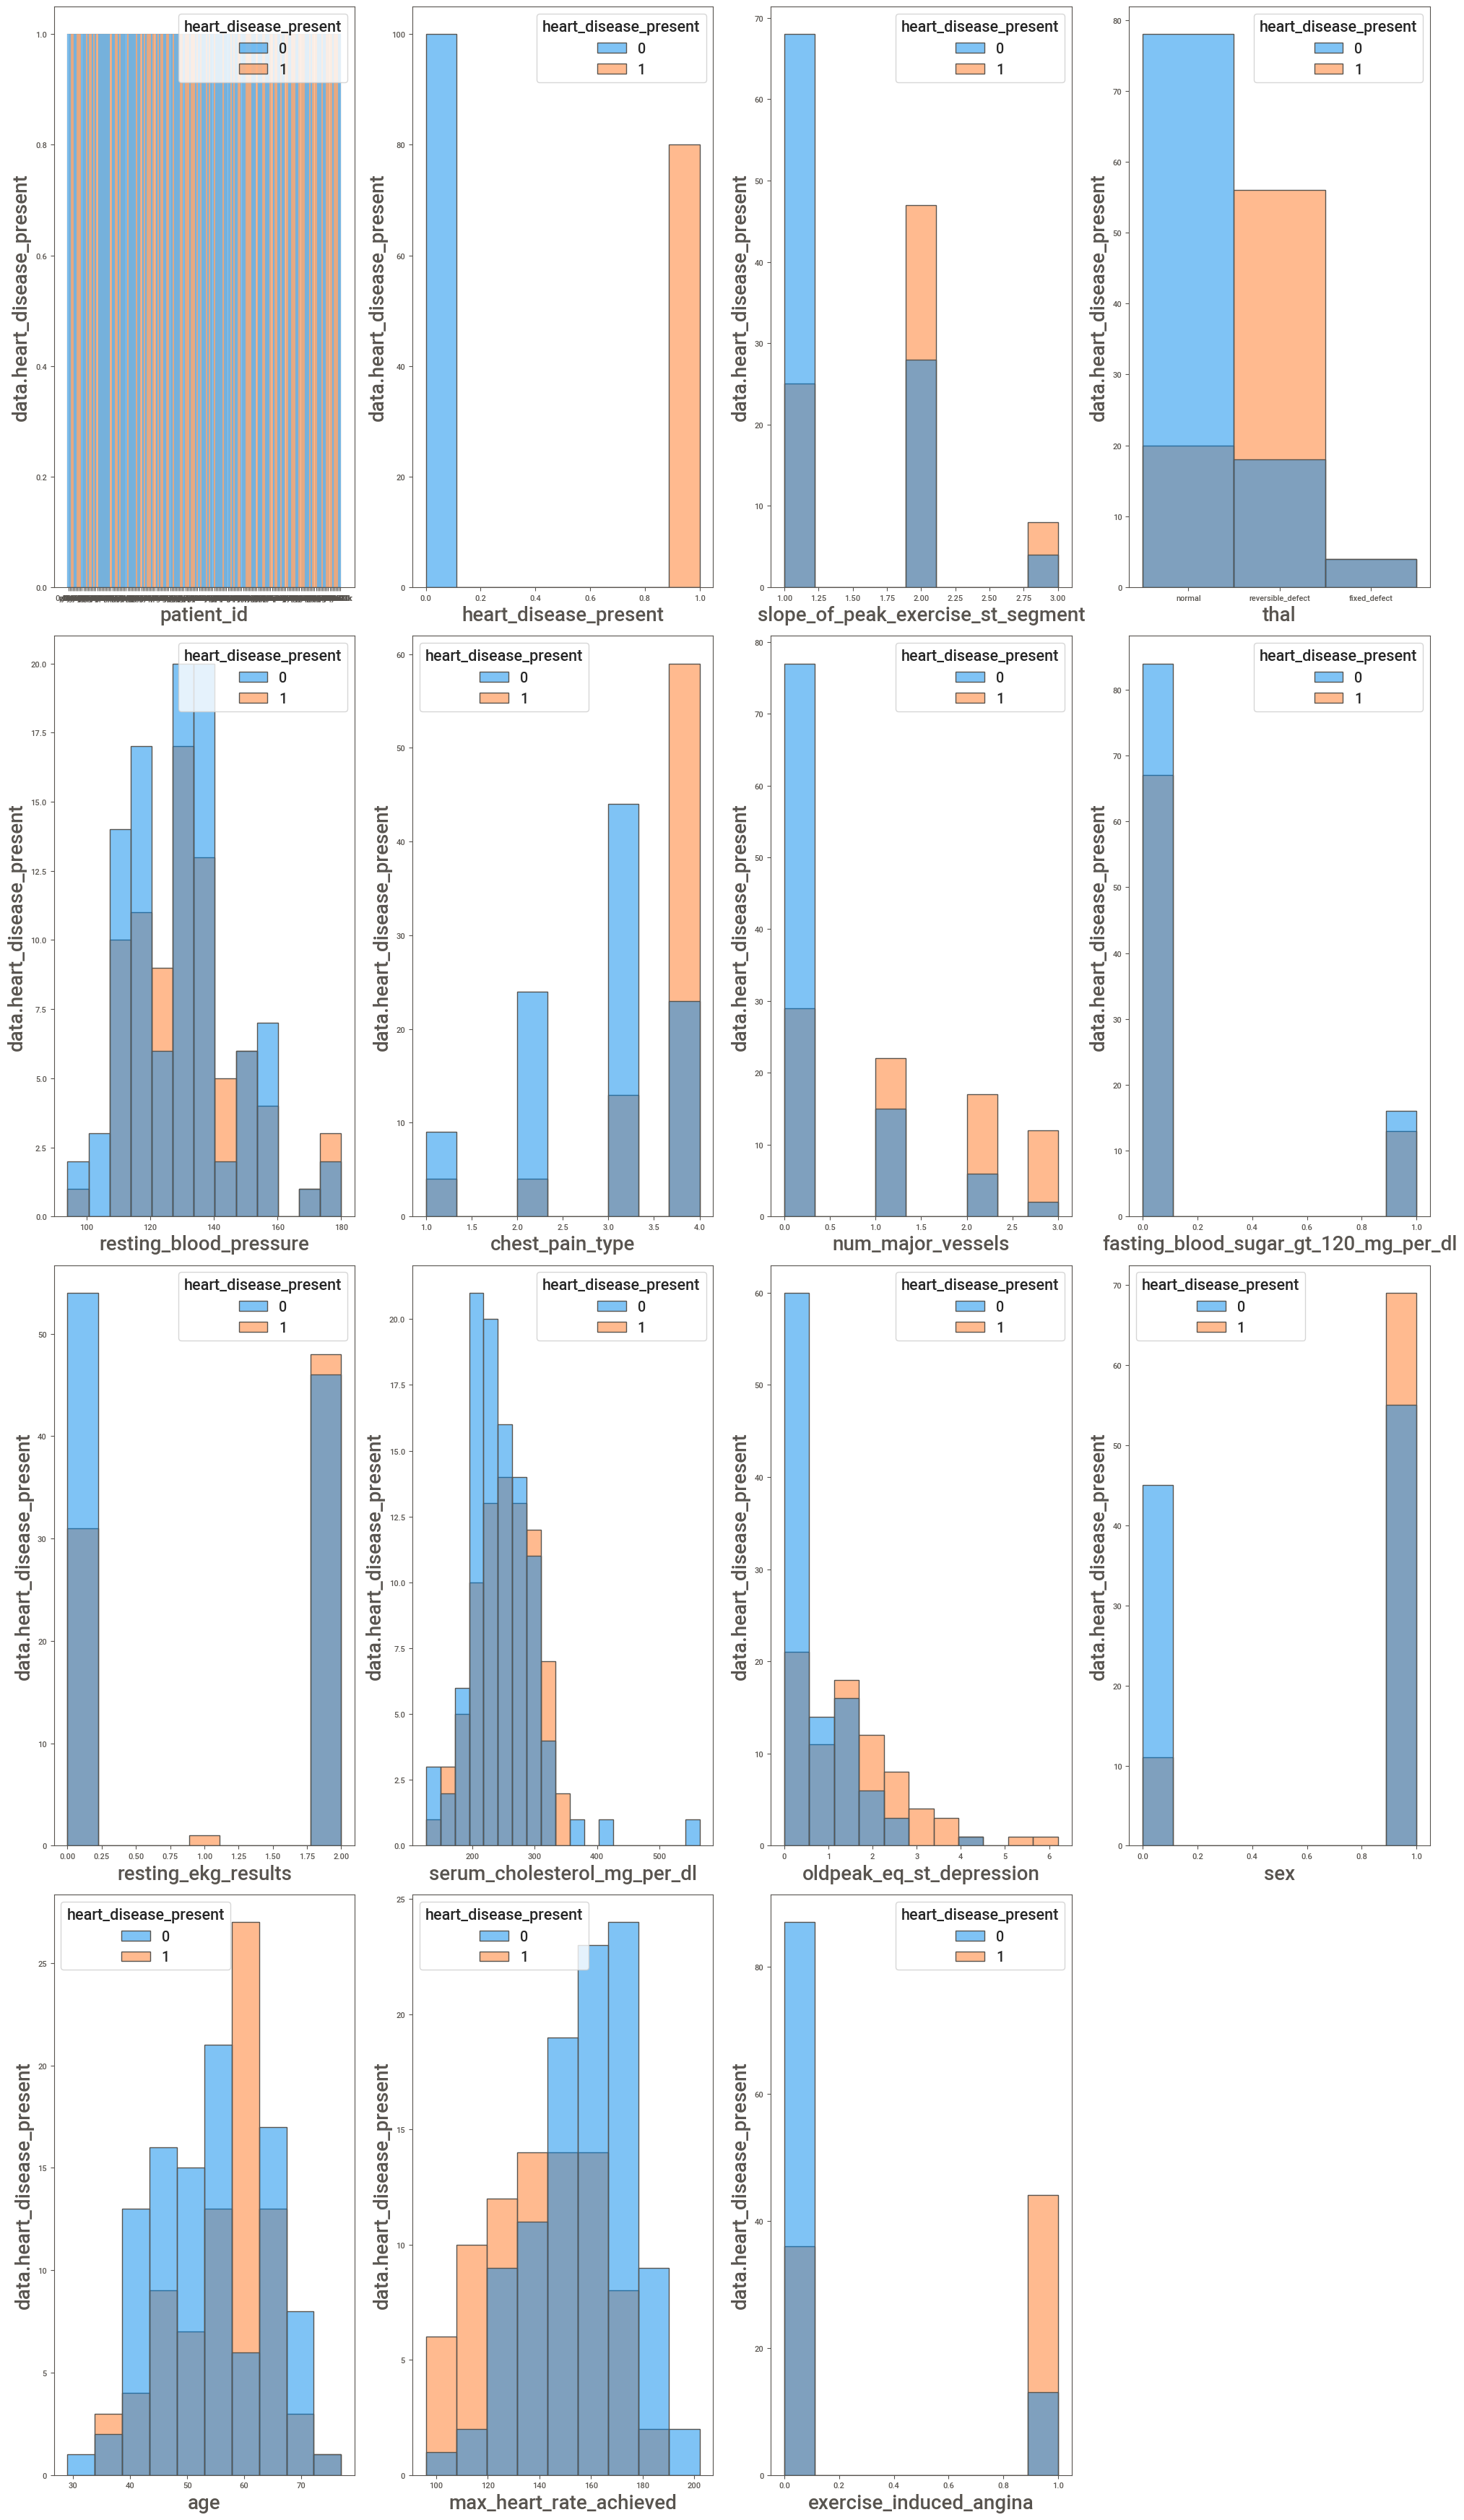

In [96]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data[column]
                        ,hue=data.heart_disease_present	)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('data.heart_disease_present',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [97]:
#insights: Around 55% heart patients have reversible defect in Thal and around 60% heart patients have chest pain type 4.
#  data shows mostly heart patient are males.

### Mutivariate Analysis

<AxesSubplot:>

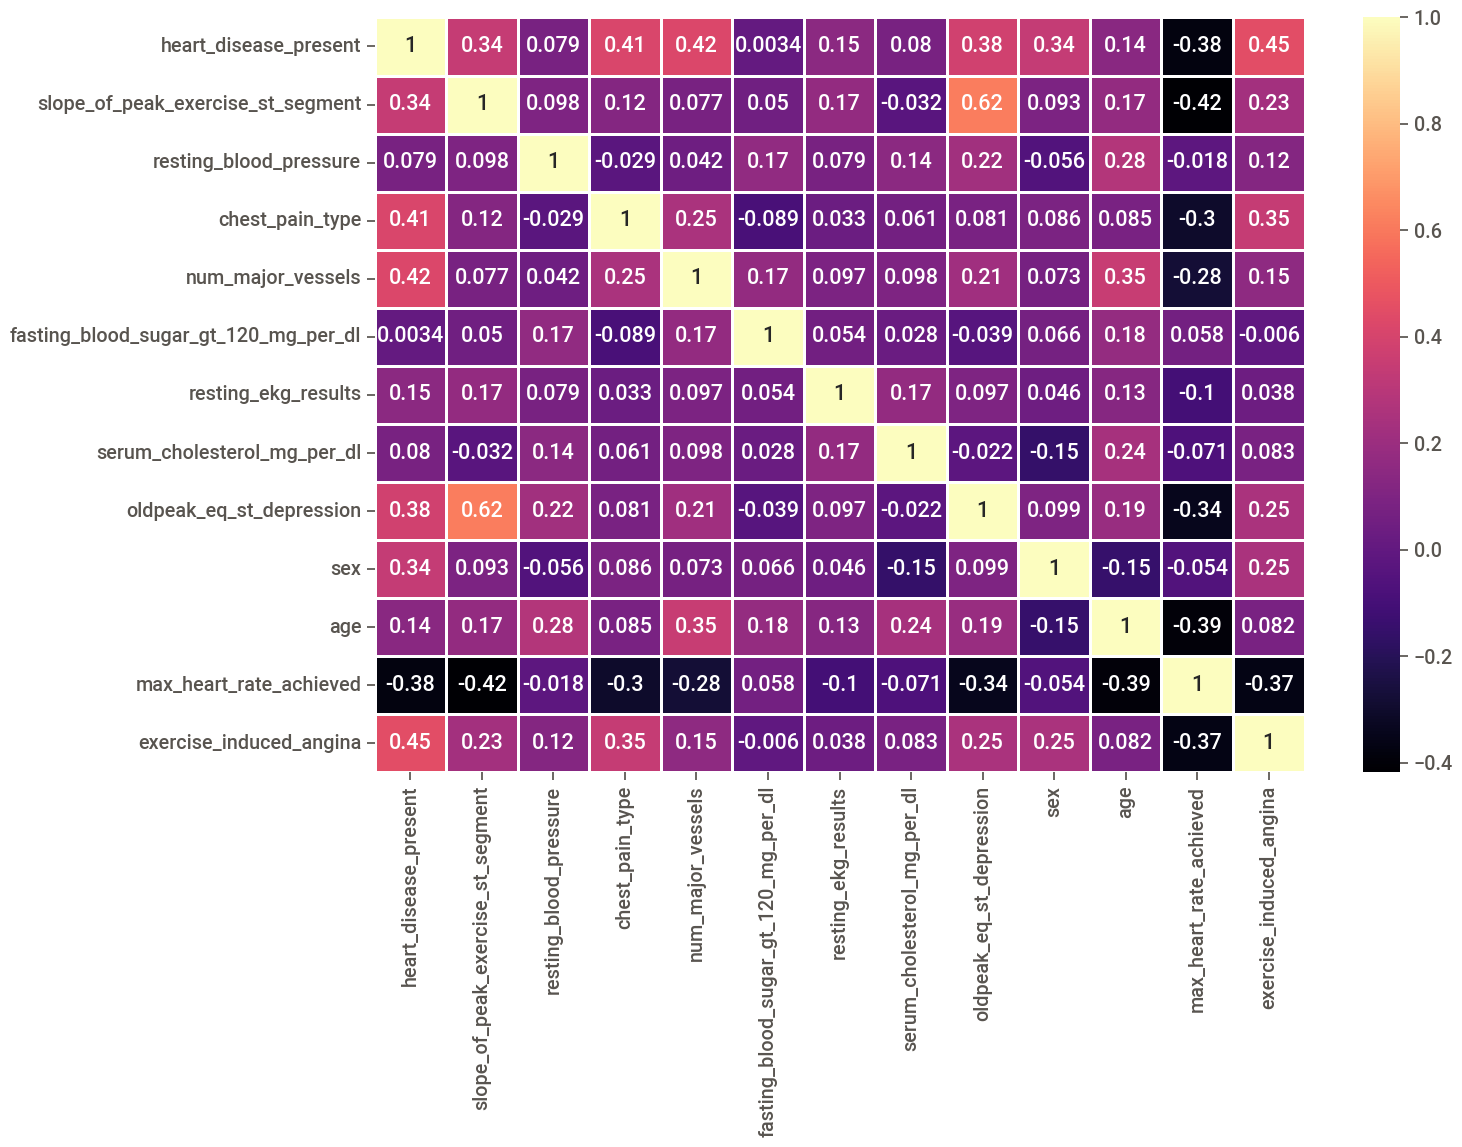

In [98]:
plt.figure(figsize = (15, 10))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(), annot = True,cmap="magma",linewidth=2)

In [99]:
# insights:there is very less correlation between heart disease and fasting blood sugar

### Data Preprocessing:

In [100]:
data.isnull().sum()

patient_id                              0
heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

 #### Handling Outliers 

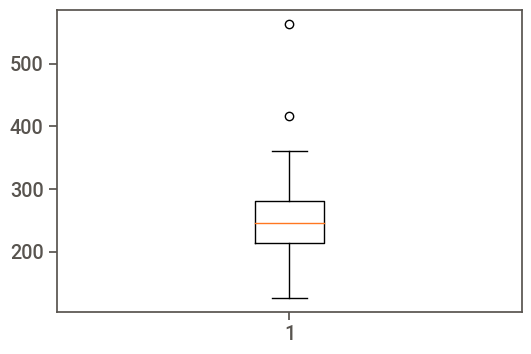

In [101]:
plt.boxplot(data.serum_cholesterol_mg_per_dl)
plt.show()

In [102]:
data.drop(data.loc[data.serum_cholesterol_mg_per_dl >=350 ].index,inplace=True)
data

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


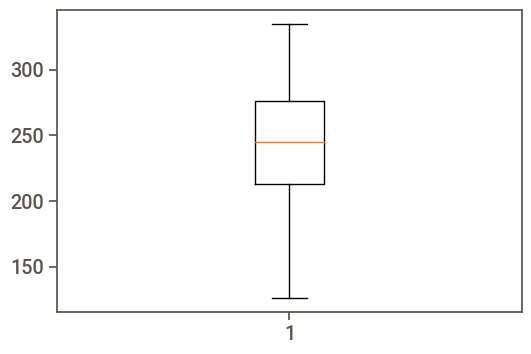

In [103]:
plt.boxplot(data.serum_cholesterol_mg_per_dl)
plt.show()

In [104]:
data.drop('fasting_blood_sugar_gt_120_mg_per_dl', axis=1,inplace=True)
data

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,2,reversible_defect,125,4,2,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,0,255,0.0,1,48,175,0


In [105]:
data.drop('patient_id', axis=1,inplace=True)
data

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,reversible_defect,125,4,2,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,0,255,0.0,1,48,175,0


In [106]:
data

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,reversible_defect,125,4,2,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,0,255,0.0,1,48,175,0


In [107]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
data.thal=label.fit_transform(data.thal)
data

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,1,128,2,0,2,308,0.0,1,45,170,0
1,0,2,1,110,3,0,0,214,1.6,0,54,158,0
2,1,1,1,125,4,3,2,304,0.0,1,77,162,1
3,1,1,2,152,4,0,0,223,0.0,1,40,181,0
4,0,3,2,178,1,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,2,125,4,2,0,254,0.2,1,67,163,0
176,1,2,1,180,4,0,1,327,3.4,0,55,117,1
177,1,2,2,125,3,0,0,309,1.8,1,64,131,1
178,0,1,1,124,3,2,0,255,0.0,1,48,175,0


In [108]:
X=data.drop('heart_disease_present',axis=1)
y=data.heart_disease_present
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128,2,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,0,254,0.2,1,67,163,0
176,2,1,180,4,0,1,327,3.4,0,55,117,1
177,2,2,125,3,0,0,309,1.8,1,64,131,1
178,1,1,124,3,2,0,255,0.0,1,48,175,0


### Model Preparation

In [109]:
X=data.drop('heart_disease_present',axis=1)
y=data.heart_disease_present

In [110]:
from imblearn.over_sampling import SMOTE 
sm=SMOTE()
print(y. value_counts())
X_sm,y_sm=sm.fit_resample(X,y)
print(y_sm.value_counts())

0    97
1    79
Name: heart_disease_present, dtype: int64
0    97
1    97
Name: heart_disease_present, dtype: int64


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [112]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[13  3]
 [ 3 17]]


Accuracy of Logistic Regression: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.85      0.85      0.85        20

    accuracy                           0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36



In [114]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))
print(pd.crosstab(y_test, nbpred))

confussion matrix
[[13  3]
 [ 3 17]]


Accuracy of Naive Bayes model: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.85      0.85      0.85        20

    accuracy                           0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36

col_0                   0   1
heart_disease_present        
0                      13   3
1                       3  17


In [115]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[12  4]
 [ 3 17]]


Accuracy of Random Forest: 80.55555555555556 

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.81      0.85      0.83        20

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.80        36



In [116]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score= accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[14  2]
 [ 4 16]]


Accuracy of Extreme Gradient Boost: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.89      0.80      0.84        20

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



In [117]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[14  2]
 [ 4 16]]


Accuracy of K-NeighborsClassifier: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.89      0.80      0.84        20

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



In [118]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score= accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[12  4]
 [ 3 17]]


Accuracy of DecisionTreeClassifier: 80.55555555555556 

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.81      0.85      0.83        20

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.80        36



In [119]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[13  3]
 [ 4 16]]


Accuracy of Support Vector Classifier: 80.55555555555556 

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.84      0.80      0.82        20

    accuracy                           0.81        36
   macro avg       0.80      0.81      0.80        36
weighted avg       0.81      0.81      0.81        36



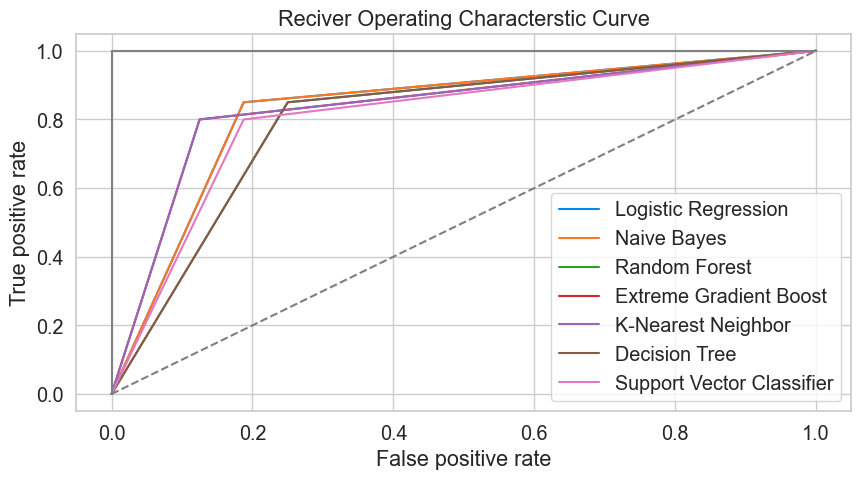

In [120]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

### Model Evaluation

In [121]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                   nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,83.333333
1,Naive Bayes,83.333333
2,Random Forest,80.555556
3,Extreme Gradient Boost,83.333333
4,K-Nearest Neighbour,83.333333
5,Decision Tree,80.555556
6,Support Vector Machine,80.555556


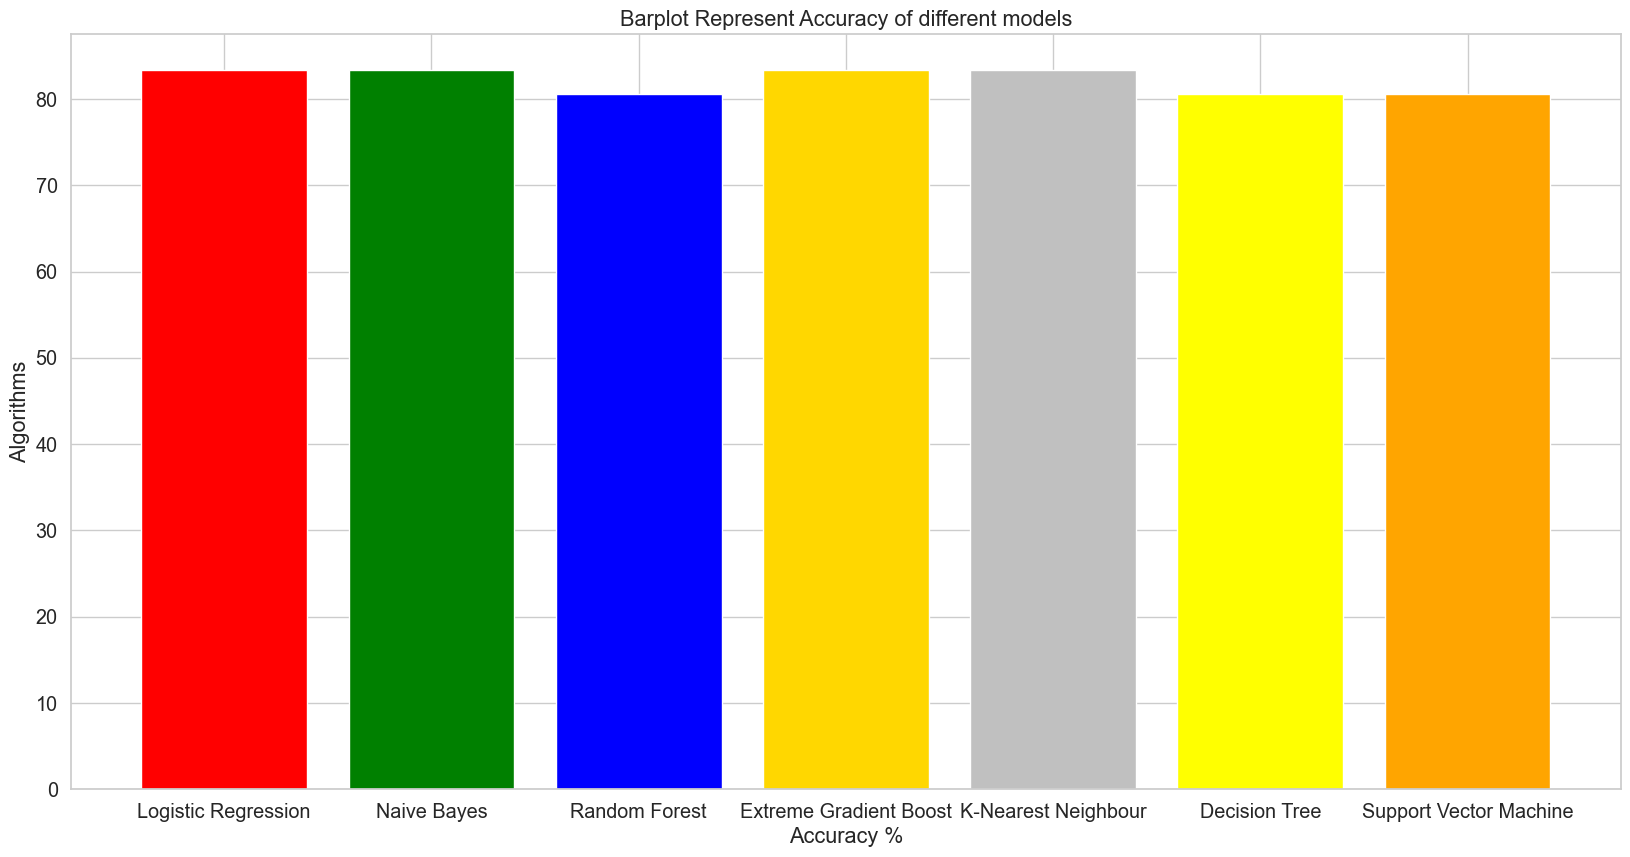

<Figure size 600x400 with 0 Axes>

In [122]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(20,10))
plt.title("Barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()
plt.tight_layout()

### Conclusion:

In [123]:
# We have tried to a predict  binary classification problem in Heart Disease Dataset by a variety of models to classifiy
# Heart Disease predictions in the context of determining whether anybody is likely to get hearth disease based on
# the input parameters like sex, age,chest pain,excercise induced angina,cholesterol,heart rate etc